In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
test_dir = Path('../data/processed/test')
train_dir = Path('../data/processed/train')

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
batch_size = 4

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255, # data should be rescale to values more appropriate for gradient descent
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# For testing, just rescale the data (it doesn't make sense to generate augmented data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read data in from train_dir 
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the training directory
        target_size=(128, 128), 
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# Read data in from test_dir 
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary')

Found 1326 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [16]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)
model.save_weights('first_try.h5')  # Save first weights

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
331/331 [==============================] - 52s 156ms/step - loss: 0.6622 - acc: 0.6579 - val_loss: 0.5637 - val_acc: 0.7317
Epoch 2/50
331/331 [==============================] - 53s 159ms/step - loss: 0.5490 - acc: 0.7289 - val_loss: 0.5509 - val_acc: 0.7533
Epoch 3/50
331/331 [==============================] - 52s 156ms/step - loss: 0.5548 - acc: 0.7651 - val_loss: 0.7357 - val_acc: 0.7633
Epoch 4/50
331/331 [==============================] - 51s 154ms/step - loss: 0.5304 - acc: 0.7583 - val_loss: 0.5314 - val_acc: 0.7700
Epoch 5/50
331/331 [==============================] - 51s 153ms/step - loss: 0.5255 - acc: 0.7832 - val_loss: 0.5293 - val_acc: 0.7200
Epoch 6/50
331/331 [==============================] - 51s 154ms/step - loss: 0.5275 - acc: 0.7734 - val_loss: 0.4637 - val_acc: 0.7867
Epoch 7/50
331/331 [==============================] - 51s 154ms/step - loss: 0.4857 - acc: 0.7931 - val_loss: 0.4616 - val_acc: 0.7750
Epoch 8

In [40]:
from skimage import color, io

import os

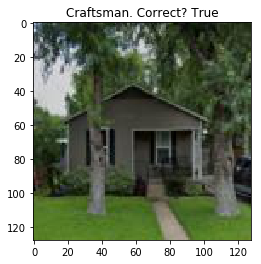

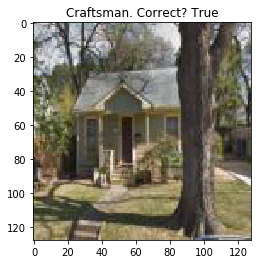

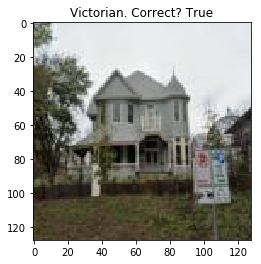

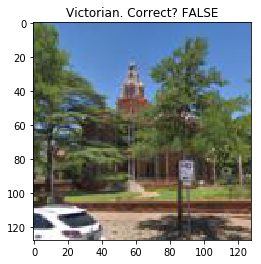

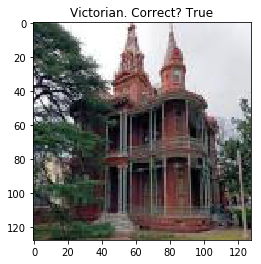

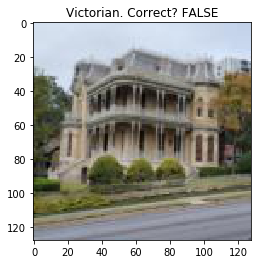

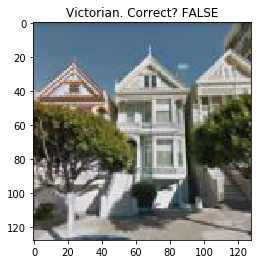

In [101]:
oos_test_dir = Path(r'C:\Users\Daniel\Documents\Python Scripts\archlass\data\processed\Testing Images')

oos_preds = []
for file in os.listdir(oos_test_dir):
    if 'victorian' in file:
        label = 1
    else:
        label = 0
    file_path = oos_test_dir / file
    im = io.imread(oos_test_dir / file).reshape(128, 128, 3)
    im = np.expand_dims(im, axis=0)/255.
    pred = model.predict(im)
    
    if np.round(pred[0][0]) == label:
        correct = True
    else:
        correct = False
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    title = 'Victorian. ' if label == 1 else 'Craftsman. '
    title += 'Correct? '
    title += 'True' if correct else 'FALSE'
    
    ax.imshow(im[0,], cmap='gray')
    ax.set_title(title)